# Calculate Exclusion Slopes over Buffer Variations

### In this exercise, you will learn how to calculate exclusion slopes for different criteria. This allows you to better understand which exclusions are critical and which are particularly sensitive to buffer changes in certain ranges. It is an important information for policymaking!

## Import required packages

In [1]:
import glaes as gl
import geokit as gk
import os
import pathlib
from copy import copy

## Define input and output paths and filenames

In [2]:
# NOTE: The results folder exists in your repo under /student_files/results/, but the files created therein will not be pushed back to git

# this is the current working directory ("student_files/exercises")
cwd = pathlib.Path().cwd()
print(f"Current working directory: {cwd}")

# the results folder is in "student_files/results", so go "2 folders up"
results_folder = os.path.join(os.path.dirname(os.path.dirname(cwd)), 'results')
# make sure folder exists
assert os.path.isdir(results_folder), f"results folder does not exist: '{results_folder}'"

print(f"Results folder:", results_folder)

Current working directory: /storage_cluster/projects/2025_c-winkler_IMP-EGH/_01_course_repository/wascal_graduate_school/student_files/exercises/Unit_04_LandEligibilityForVolatileRenewableEnergySources
Results folder: /storage_cluster/projects/2025_c-winkler_IMP-EGH/_01_course_repository/wascal_graduate_school/student_files/results


In [3]:
region_shp = r"region_shapefiles//COUNTRY_gadm_shapes_GID_level_1.shp"
WSF2019_basepath = r"exclusion_datasets//WSF2019//COUNTRY//COUNTRY_extract_WSF2019_resampled.tif"

In [4]:
# just like before, we determine our datafolder, here in a one liner
data_basefolder = os.path.join(pathlib.Path().cwd().parent.parent, 'data')
print(data_basefolder)

/storage_cluster/projects/2025_c-winkler_IMP-EGH/_01_course_repository/wascal_graduate_school/student_files/data


## First understand how to fill a table with data iteratively

In [5]:
# import pandas - this should usually be done at the head of the script but is shown here since it is needed for this step
# pandas is the main tool for dataframe handling, the equivalent of tables
import pandas as pd

# with pandas, we can create an empty dataframe which we call 'df'
df = pd.DataFrame()

# the dataframe looks very boring still, it is empty
df

""


In [6]:
# we can set values in the above dataframe like this:
df.loc['first_row_index','first_column_name']='some_value'
# if the row or column indices do not exist, they will be created
df.loc['second_row_index','second_column_name']='also_some_value'
# but we can also set values into existing row/column combinations (we can even overwrite)
df.loc['first_row_index','second_column_name']='existing combination'
# you can see that these row/column combinations where no data has been set are NaN (Not a Number)
df

,first_column_name,second_column_name
first_row_index,some_value,existing combination
second_row_index,NaN,also_some_value


In [7]:
# the for loop will iterate through an iterable of values and the iteration variable (e.g. here: var) will take the value of the respective entry in the iterable
for var in ['a','b',3,'d']:
    print(var) #this will print the value that var takes for each iteration

a
b
3
d


In [8]:
# instead of printing, we can do ANY task here
df = pd.DataFrame()

some_dict={5:20, 10:22, 15:27}
some_otherdict={5:12, 10:19, 15:29}

for var in [5,10,15]:
    df.loc[var, 'some_usecase']=some_dict[var]

# we can do that again for some other usecase
# NOTE that the iterable (here the list [5, 10, 15]) is the same, meaning that no new rows need to be added
for var in [5,10,15]:
    df.loc[var, 'some_other_usecase']=some_otherdict[var]

# we now have a pandas dataframe with some numbers - a small table!
df

,some_usecase,some_other_usecase
5,20.0,12.0
10,22.0,19.0
15,27.0,29.0


<Axes: >

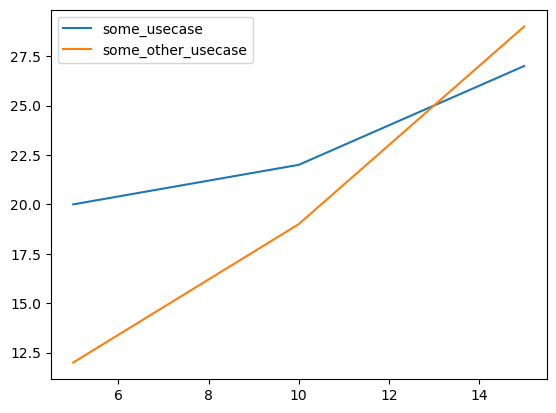

In [9]:
# we can now plot the variations, you see that the index is shown on the x axis and the column values are the y values!
# the legend shows the respective column names
df.plot()

# TASK: Plot the exclusion slope based on at least 5 value pairs, for an exclusion of water surfaces and forests. Use a basic exclusion buffer of 100m for both criteria.

### NOTE: You can use any method, but you may find some of the iteration and plotting approaches helpful that are shown here above. Exclusion calculation was introduced in the earlier exercises. (Please use the study region that we used in the earlier exercises as well)

### NOTE: What information  do you draw from the resulting plot? Make some notes so we can discuss together afterwards!